In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize  import curve_fit
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from scipy.stats import norm,t
import scipy as sp
from scipy import interpolate
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# from adjustText import adjust_text
from ast import literal_eval
# from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
# from matplotlib_venn import venn3, venn3_circles

from scipy.stats import kde
import seaborn as sns
from scipy.stats import fisher_exact
from scipy.interpolate import Rbf
from scipy import stats
from scipy.stats import norm,t
# import gseapy as gp

## This code reproduces the data shown in Fig 2 and 6. 
## To run this script .. download the supplementary table 1 to the same folder and read the excel file


In [3]:
tmt5_location= pd.read_csv('../E.coli resources/MG1655_gene_names_location.csv')

In [12]:
sheets= pd.read_excel('Supplementary_tables.xlsx').iloc[3:, 1:].reset_index(drop=True)

# sheets= pd.read_excel('C:/Users/gupta/Downloads/20240115_Supplementary_tables_AJ.xlsx').iloc[3:, 1:].reset_index(drop=True)


sheets.columns= sheets.iloc[0]
sheets= sheets[1:]
sheets

,Protein ID,Gene names,MinimalMedia_1,MinimalMedia_2,MinimalMedia_mean,C-lim3_1,C-lim3_2,C-lim3_mean,C-lim6_1,C-lim6_2,...,lonN-lim6_mean,hslVN-lim6_1,hslVN-lim6_2,hslVN-lim6_mean,TripleN-lim6_1,TripleN-lim6_2,TripleN-lim6_mean,smpBN-lim6_1,smpBN-lim6_2,smpBN-lim6_mean
1,sp|A5A614|YCIZ_ECOLI,yciZ,0.447613,NaN,0.447613,NaN,NaN,NaN,3.932642,3.601144,...,NaN,NaN,NaN,NaN,NaN,8,8,2.709852,NaN,2.709852
2,sp|O32583|THIS_ECOLI,thiS,0.429502,0.673641,0.551571,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.753911,2.753911,NaN,NaN,NaN
3,sp|P00350|6PGD_ECOLI,gnd,0.915468,0.798815,0.857141,3.248315,3.163151,3.205733,5.572427,6.131487,...,5.579855,4.878272,5.125577,5.001925,5.096037,5.348656,5.222346,4.618487,4.735837,4.677162
4,sp|P00363|FRDA_ECOLI,frdA,0.77962,0.780088,0.779854,2.992966,2.946457,2.969711,6.080384,6.670409,...,6.239523,6.948518,6.23801,6.593264,6.127775,5.856748,5.992261,5.37113,5.522602,5.446866
5,sp|P00370|DHE4_ECOLI,gdhA,0.770254,0.670745,0.7205,3.076857,2.810401,2.943629,4.462108,4.855534,...,2.130432,1.880388,1.721408,1.800898,3.275116,3.778868,3.526992,2.088484,2.20117,2.144827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,sp|P0AAD4|TYRP_ECOLI,tyrP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.480729,6.480729
3259,sp|P42592|YGJK_ECOLI,ygjK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.15199,6.15199
3260,sp|P69330|CITD_ECOLI,citD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087499,1.087499
3261,sp|P77294|YDER_ECOLI,ydeR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.552677,5.552677


In [19]:
# For Figure 2

Dilution_half_life_hrs= 6
nlim6_1= sheets[['Protein ID', 'Gene names ', 'N-lim6_1']].rename(columns={'N-lim6_1': 'rep1'})
nlim6_2= sheets[['Protein ID', 'Gene names ', 'N-lim6_2']].rename(columns={'N-lim6_2': 'rep2'})

clppnlim6_1= sheets[['Protein ID', 'Gene names ', 'clpPN-lim6_1']].rename(columns={'clpPN-lim6_1': 'rep1'})
clppnlim6_2= sheets[['Protein ID', 'Gene names ', 'clpPN-lim6_2']].rename(columns={'clpPN-lim6_2': 'rep2'})

lonnlim6_1= sheets[['Protein ID', 'Gene names ', 'lonN-lim6_1']].rename(columns={'lonN-lim6_1': 'rep1'})
lonnlim6_2= sheets[['Protein ID', 'Gene names ', 'lonN-lim6_2']].rename(columns={'lonN-lim6_2': 'rep2'})

hslvnlim6_1= sheets[['Protein ID', 'Gene names ', 'hslVN-lim6_1']].rename(columns={'hslVN-lim6_1': 'rep1'})
hslvnlim6_2= sheets[['Protein ID', 'Gene names ', 'hslVN-lim6_2']].rename(columns={'hslVN-lim6_2': 'rep2'})

tkonlim6_1= sheets[['Protein ID', 'Gene names ', 'TripleN-lim6_1']].rename(columns={'TripleN-lim6_1': 'rep1'})
tkonlim6_2= sheets[['Protein ID', 'Gene names ', 'TripleN-lim6_2']].rename(columns={'TripleN-lim6_2': 'rep2'})


# For Figure 6 
Dilution_half_life_hrs= 12
clim12_1= sheets[['Protein ID', 'Gene names ', 'C-lim12_1']].rename(columns={'C-lim12_1': 'rep1'},)
clim12_2= sheets[['Protein ID', 'Gene names ', 'C-lim12_2']].rename(columns={'C-lim12_2': 'rep2'})

Dilution_half_life_hrs= 3
clim3_1= sheets[['Protein ID', 'Gene names ', 'C-lim3_1']].rename(columns={'C-lim3_1': 'rep1'},)
clim3_2= sheets[['Protein ID', 'Gene names ', 'C-lim3_2']].rename(columns={'C-lim3_2': 'rep2'},)

Dilution_half_life_hrs= (42.45/60)
expgrowth_1= sheets[['Protein ID', 'Gene names ', 'MinimalMedia_1']].rename(columns={'MinimalMedia_1': 'rep1'},)
expgrowth_2= sheets[['Protein ID', 'Gene names ', 'MinimalMedia_2']].rename(columns={'MinimalMedia_2': 'rep2'},)

Dilution_half_life_hrs= (6)
clim6_1= sheets[['Protein ID', 'Gene names ', 'C-lim6_1']].rename(columns={'C-lim6_1': 'rep1'},)
clim6_2= sheets[['Protein ID', 'Gene names ', 'C-lim6_2']].rename(columns={'C-lim6_2': 'rep2'},)


In [20]:
# filevar_names = ['clim12_1', 'clim12_2','nlim12_1','nlim12_2','plim12_1','plim12_2','nlim6_1','nlim6_2','plim6_1','plim6_2','clim6_1','clim6_2','expgrowth_1', 'expgrowth_2','clppnlim6_1', 'clppnlim6_2','tkonlim6_1', 'hslvnlim6_1','hslvnlim6_2', 'lonnlim6_1','lonnlim6_2', 'ycbZnlim6_1', 'ftsHnlim6_1', 'glucnlim6_1', 'tkonlim6_2', 'relAnlim6_1','relAnlim6_2', 'mc4100nlim6_1', 'smpBnlim6_1', 'smpBnlim6_2']
filevar_names = ['nlim6_1','nlim6_2','clppnlim6_1', 'clppnlim6_2','tkonlim6_1', 'hslvnlim6_1','hslvnlim6_2', 'lonnlim6_1','lonnlim6_2',  'tkonlim6_2', 'expgrowth_1', 'expgrowth_2','clim6_1','clim6_2','clim12_1', 'clim12_2' , 'clim3_1', 'clim3_2']

for filevar_name in filevar_names:
    
    print("-------Evaluating: ",filevar_name,"----------------")
    if filevar_name.split('_')[0] == 'expgrowth':
        element = (42.45/60)
        element2 = filevar_name.split('_')[1]
        tolerance= 2- (42.45/60)
    else:
        element = int(filevar_name.split('lim')[1].split('_')[0])
        element2 = filevar_name.split('_')[1]
        if element ==6: 
            tolerance= 2
        elif element ==3: 
            tolerance= 1
        else:
            tolerance=4
        print (element, element2)
 
    if element == 6:
        print("The number of negatives in filename ",filevar_name,"are: ",(eval(filevar_name)['rep'+element2]<0).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]<0),'rep'+element2] = element

        print("The number of values in filename ",filevar_name,"with half lives greater than ",str(element),"+", str(tolerance), "are: ",(eval(filevar_name)['rep'+element2]-tolerance>element).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]-tolerance>element),'rep'+element2] = element+tolerance
        
    elif ((element == 12)):
        print("The number of negatives in filename ",filevar_name,"are: ",(eval(filevar_name)['rep'+element2]<0).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]<0),'rep'+element2] = element

        print("The number of values in filename ",filevar_name,"with half lives greater than ",str(element),"+", str(tolerance), "are: ",(eval(filevar_name)['rep'+element2]-tolerance>element).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]-tolerance>element),'rep'+element2] = element+tolerance
    
    elif ((element==3)):
        print("The number of negatives in filename ",filevar_name,"are: ",(eval(filevar_name)['rep'+element2]<0).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]<0),'rep'+element2] = element

        print("The number of values in filename ",filevar_name,"with half lives greater than ",str(element),"+", str(tolerance), "are: ",(eval(filevar_name)['rep'+element2]-tolerance>element).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]-tolerance>element),'rep'+element2] = element+tolerance
    
    else:
        print("The number of negatives in filename ",filevar_name,"are: ",(eval(filevar_name)['rep'+element2]<0).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]<0),'rep'+element2] = element

        print("The number of values in filename ",filevar_name,"with half lives greater than ",str(element),"+", str(tolerance), "are: ",(eval(filevar_name)['rep'+element2]-tolerance>element).sum())
        eval(filevar_name).loc[(eval(filevar_name)['rep'+element2]-tolerance>element),'rep'+element2] = element+tolerance
    print("-------Completed: ",filevar_name,"----------------")
    print("\n")


-------Evaluating:  nlim6_1 ----------------
6 1
The number of negatives in filename  nlim6_1 are:  0
The number of values in filename  nlim6_1 with half lives greater than  6 + 2 are:  0
-------Completed:  nlim6_1 ----------------


-------Evaluating:  nlim6_2 ----------------
6 2
The number of negatives in filename  nlim6_2 are:  0
The number of values in filename  nlim6_2 with half lives greater than  6 + 2 are:  0
-------Completed:  nlim6_2 ----------------


-------Evaluating:  clppnlim6_1 ----------------
6 1
The number of negatives in filename  clppnlim6_1 are:  0
The number of values in filename  clppnlim6_1 with half lives greater than  6 + 2 are:  0
-------Completed:  clppnlim6_1 ----------------


-------Evaluating:  clppnlim6_2 ----------------
6 2
The number of negatives in filename  clppnlim6_2 are:  0
The number of values in filename  clppnlim6_2 with half lives greater than  6 + 2 are:  0
-------Completed:  clppnlim6_2 ----------------


-------Evaluating:  tkonlim6_1 -

In [57]:
def header_splitter(x):
#     print("hi")
#     print(x)
    if(x.count('|')==2):
         y=x.split('|')[1]  # takes only number as an identifier
    elif (x.count('|')==1):
         y=x.split('|')[0] 
    else:
         y=x
    return y

def sub_cellular(choice, df): 
    if choice =='o': 
        df_return = df[(df['Subcellular location [CC] 1'].str.contains('outer')==True) & (df['Subcellular location [CC] 1'].str.contains('membrane')==True) ]
    elif choice =='p': 
        df_return= df[df['Subcellular location [CC] 1'].str.contains('Periplasm')==True]
    elif choice=='c': 
        df_return= df[df['Subcellular location [CC] 1'].str.contains('Cytoplasm')==True]
    elif choice=='m': 
        df_return= df[df['Subcellular location [CC] 1'].str.contains('membrane')==True]
    elif choice=='i': 
        df_return = df[(df['Subcellular location [CC] 1'].str.contains('outer')==False) & (df['Subcellular location [CC] 1'].str.contains('membrane')==True) ]
    return (df_return)

def active_degrading_func(df, filename1,cutoff_pvalue): 
    df['Entry']= df['Protein ID'].apply(header_splitter)
    df= df.merge(tmt5_location[['Entry', 'Subcellular location [CC] 1', 'membrane_confirmation']], on='Entry', how='left')
        
    relevant_degrading = df[df['average_hl_%s'%(filename1.split (' ')[0])]<=Dilution_half_life_hrs]
    relevant_degrading2 = relevant_degrading [relevant_degrading ['pvalues_hl_%s_new'%(filename1.split (' ')[0])]<=cutoff_pvalue]
    
    return (relevant_degrading2, float(len(relevant_degrading2))/ len(df))

### Conservative error estimates from the replicates
def shared_variance(df,average_hl_colname,filename):
    if Dilution_half_life_hrs==6: 
        bins = [0,2,5,8]
    elif Dilution_half_life_hrs==12: 
        bins= [0,2, 4, 8, 10, 16]
    elif Dilution_half_life_hrs==3: 
        bins= [0,1, 2, 3, 7]
    else: 
        bins= [0,0.5, 2]
    
    # Step1: Divide half_lives into bins
        
    df.loc[:,'average_hl_bin'] = pd.cut(df[average_hl_colname],bins)

    # Step2: Calculate the median sandard error of each bin
    
    df = df.merge(pd.DataFrame(df[~df['average_hl_bin'].isnull()].groupby('average_hl_bin')['hl_std_error'].quantile(0.5).reset_index(drop=False).rename({'hl_std_error':'hl_std_error_50percentile'},axis=1)),how='left')
   
    # Step 3: Make all the proteins in a bin have the median std error 
    # or its original value if that is greater than the median 
    
    df.loc[:,'hl_std_error_new'] = df['hl_std_error']
    df.loc[df['hl_std_error']<=df['hl_std_error_50percentile'],'hl_std_error_new'] = df['hl_std_error_50percentile']
    df.loc[df['hl_std_error'].isnull(),'hl_std_error_new'] = df['hl_std_error_50percentile']
    
    df['hl_zscore_new']=(df[average_hl_colname]- Dilution_half_life_hrs)/ df['hl_std_error_new']
    df['pvalues_hl_%s_new'%(filename.split (' ')[0])]= df['hl_zscore_new'].map(lambda x:(1 - t.cdf(abs(x), 1)))

    return (df.drop(columns=['average_hl_bin']))

def merge_replicates (a, b, filename1): 
    
    if Dilution_half_life_hrs==12: 
        limit_value=16
    elif Dilution_half_life_hrs==6 : 
        limit_value=8 
    elif Dilution_half_life_hrs==3: 
        limit_value= 5
    else: limit_value=2
 
    merged= a[['Protein ID', 'rep1']].merge(b[['Protein ID', 'rep2']], on='Protein ID', how='inner').dropna()
   
    print ('The number of proteins in each data set merged %d'%(merged.shape[0]))

    merged['Entry']= merged['Protein ID'].apply(header_splitter)
    merged= merged.merge(tmt5_location[['Entry', 'Gene names ', 'Subcellular location [CC] 1', 'membrane_confirmation']], on='Entry', how='left')
    merged['rep1_cap']= merged['rep1'].map(lambda x: Dilution_half_life_hrs if x>Dilution_half_life_hrs else x)
    merged['rep2_cap']= merged['rep2'].map (lambda x: Dilution_half_life_hrs if x>Dilution_half_life_hrs else x )
    
   ########################### Calculate p values based on replicates #################################################

    rep_columns=['Protein ID', 'Gene names ']+ [col for col in merged.columns if 'rep' in col]
    merged1= merged.loc[:,rep_columns]
    merged1.loc[:,'average_hl_%s'%(filename1.split (' ')[0])]= (merged1[['rep1','rep2']].mean(axis=1))
    
    merged1.loc[:,'hl_std_dev']= merged1[['rep1', 'rep2']].std(axis=1)
    merged1.loc[:,'hl_std_error']= merged1[['rep1', 'rep2']].std(axis=1)/ np.sqrt(2)
    merged1.loc[:,'hl_zscore']=(merged1['average_hl_%s'%(filename1.split (' ')[0])]- Dilution_half_life_hrs)/ merged1['hl_std_error']
    merged1.loc[:,'pvalues_hl_%s'%(filename1.split (' ')[0])]= merged1['hl_zscore'].map(lambda x:(1 - t.cdf(abs(x), 1)) * 2)
    return_df = (merged1.loc[:,['Protein ID','Gene names ','hl_std_error','average_hl_%s'%(filename1.split (' ')[0]), 'pvalues_hl_%s'%(filename1.split (' ')[0])]])
    
    merged2=shared_variance(return_df.copy(),average_hl_colname = 'average_hl_%s'%(filename1.split (' ')[0]),filename=filename1)

    merged2['Entry']= merged2['Protein ID'].apply(header_splitter)
    merged2= merged2.merge(tmt5_location[['Entry', 'Gene names ', 'Subcellular location [CC] 1', 'membrane_confirmation']], on='Entry', how='left')
    merged2.loc[:,'average_hl_%s_cap'%(filename1.split (' ')[0])]= merged2.loc[:,'average_hl_%s'%(filename1.split (' ')[0])].map (lambda x: Dilution_half_life_hrs if x>Dilution_half_life_hrs else x )
    merged2= merged2.rename(columns={'hl_std_error_new': 'hl_std_error_new_%s'%(filename1.split (' ')[0]), 'hl_std_error': 'hl_std_error_%s'%(filename1.split (' ')[0])})
    
    
    degrading, fraction_degrading= active_degrading_func(merged2.copy(),filename1, 0.05)
    degrading['Degrading']='yes'
    merged2= merged2.merge(degrading[['Protein ID', 'Degrading']], on='Protein ID', how='left')
    print ('Fraction of the proteome degrading %f'%(fraction_degrading))
    return (merged2)

# Figure 2 

In [58]:
Dilution_half_life_hrs=6
filename= 'N limited 6'
nlim6_merged= merge_replicates(nlim6_1,nlim6_2,filename1= filename).rename(columns={'Gene names _x': 'Gene names '})

Dilution_half_life_hrs=6
filename= 'clpp N limited 6'
clpp6_merged= merge_replicates(clppnlim6_1, clppnlim6_2, filename1= filename).rename(columns={'Gene names _x': 'Gene names '})

Dilution_half_life_hrs=6
filename= 'lon N limited 6'
lon6_merged= merge_replicates(lonnlim6_1, lonnlim6_2,filename1= filename).rename(columns={'Gene names _x': 'Gene names '})

Dilution_half_life_hrs=6
filename= 'hslv N limited 6'
hslv6_merged= merge_replicates(hslvnlim6_1, hslvnlim6_2, filename1= filename).rename(columns={'Gene names _x': 'Gene names '})

Dilution_half_life_hrs=6
filename= 'Tripple knockout N limited 6'
tko6_merged= merge_replicates(tkonlim6_1,tkonlim6_2,filename1= filename).rename(columns={'Gene names _x': 'Gene names '})


The number of proteins in each data set merged 2059
Fraction of the proteome degrading 0.433220
The number of proteins in each data set merged 2093
Fraction of the proteome degrading 0.297181
The number of proteins in each data set merged 2113
Fraction of the proteome degrading 0.269285
The number of proteins in each data set merged 2054
Fraction of the proteome degrading 0.388997
The number of proteins in each data set merged 2423
Fraction of the proteome degrading 0.080891


In [59]:
def mutant_wt_comparison (a,b, cutoff=None):

        #### Inner Merge the files with relevant columns ###############################################################
        mutant_cols= ['Protein ID', [col for col in a.columns if 'hl_std_error_new' in col][0]]+ [col for col in a.columns if 'average_hl' in col]
        wt_cols= ['Protein ID', [col for col in b.columns if 'hl_std_error_new' in col][0]]+ [col for col in b.columns if 'average_hl' in col]
        a= a[mutant_cols]
        b= b[wt_cols]
        merged= a.merge(b, on='Protein ID', how='inner')
        merged['Entry']= merged['Protein ID'].apply(header_splitter)
        merged= merged.merge(tmt5_location[['Entry', 'Subcellular location [CC] 1', 'membrane_confirmation']], on='Entry', how='left')


        ############# Compute p values for significant changes ###################

        from scipy.stats import norm,t
        merged.loc[:, 'magnitude_difference']= merged['average_hl_N_cap']-merged[[col for col in merged.columns if 'cap' in col][0]]
        # Either use gene specific error values .. doesnt make sense
        ## merged.loc[:, 'comparison_std_error']= np.sqrt(np.power(merged['hl_std_error_for_mutant'],2)*2)
        # Use shared varaince from replicate data to assign to each gene and run a t-test
        merged.loc[:, 'comparison_std_error']= np.sqrt(np.power(merged[[col for col in merged.columns if ('std_error_new' in col)]],2).sum(axis=1))
        merged.loc[:, 'comparison_zscore']= merged.loc[:, 'magnitude_difference']/merged.loc[:, 'comparison_std_error'] 
        merged.loc[:, 'comparison_pvalues']=merged.loc[:, 'comparison_zscore'].map(lambda x:(1 - t.cdf(abs(x), 1)))
        merged = merged.dropna(subset=['comparison_pvalues'])

   
        relevant_genes_reference= merged[(-1*np.log10( np.array(merged['comparison_pvalues']))>-np.log10(cutoff)) &(merged['magnitude_difference']<0)]

        #  Scatter plots and substrates

        fig=plt.figure(figsize=(4,4), dpi=150)
        ax = fig.add_subplot(111)

        cols1= [col for col in merged.columns if ('average_hl' in col) & ('cap' not in col)]
        cols2= [col for col in merged.columns if ('cap' in col) ]

        ax.scatter(merged[cols1[0]], merged[cols1[1]], s=15, alpha=1, color='gainsboro', edgecolors='dimgray')


        if (len(relevant_genes_reference)>0):

            ax.scatter(relevant_genes_reference[cols1[0]], relevant_genes_reference[cols1[1]], s=25, alpha=1, color='black', marker='x')
      
        ax.axis('equal')
        ax.set_xticks(np.arange(0, Dilution_half_life_hrs+6, 2))
        ax.set_yticks(np.arange(0, Dilution_half_life_hrs+6,2))
        ax.set(xlim=(0, Dilution_half_life_hrs+2), ylim=(0,Dilution_half_life_hrs+2))
        plt.axvline(Dilution_half_life_hrs, color='black', ls='--', lw=2)
        plt.axhline(Dilution_half_life_hrs, color='black', ls='--', lw=2)
        plt.plot(np.linspace(0,Dilution_half_life_hrs+6,100), np.linspace(0,Dilution_half_life_hrs+6,100), ls='-', lw=2, color='black')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)


      #Periplasm and Membrane and cytoplasm

        cytoplasm= sub_cellular('c', merged)
        membrane= sub_cellular('m', merged)
        periplasm= sub_cellular('p', merged)
        data_membrane= membrane[[cols1[0], cols1[1]]].dropna()
        data_cytoplasm= cytoplasm [[cols1[0],cols1[1]]].dropna()
        data_periplasm= periplasm [[cols1[0],cols1[1]]].dropna()

        sns.kdeplot(data_membrane[cols1[0]], data_membrane[cols1[1]], levels= [0.50, 0.995], **{'color': 'lime', "linewidths": 5}, bw_adjust=0.9)
        sns.kdeplot(data_cytoplasm[cols1[0]], data_cytoplasm[cols1[1]], levels= [0.50, 0.995],** {'color': 'red', "linewidths": 5}, bw_adjust=0.9)

        plt.xlabel('')
        plt.ylabel('')
        plt.title(filename)

        fig.tight_layout()
        plt.show()

        relevant_genes_reference_return= relevant_genes_reference.merge(tmt5_location[['Entry', 'Gene names ']], on='Entry', how='left')
        print (len(relevant_genes_reference_return))
        return (relevant_genes_reference_return)


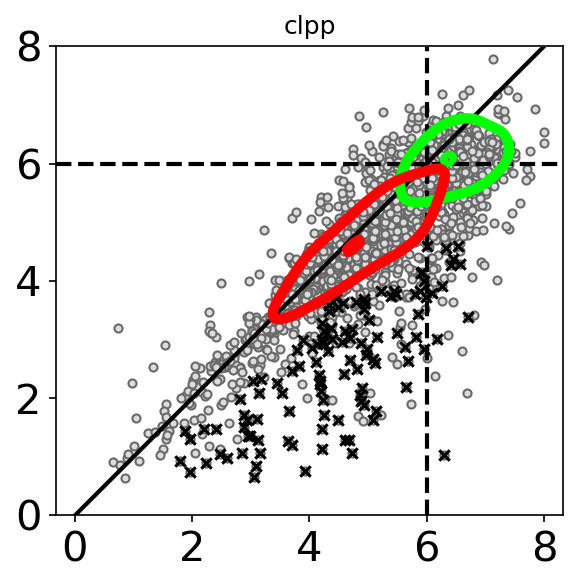

114


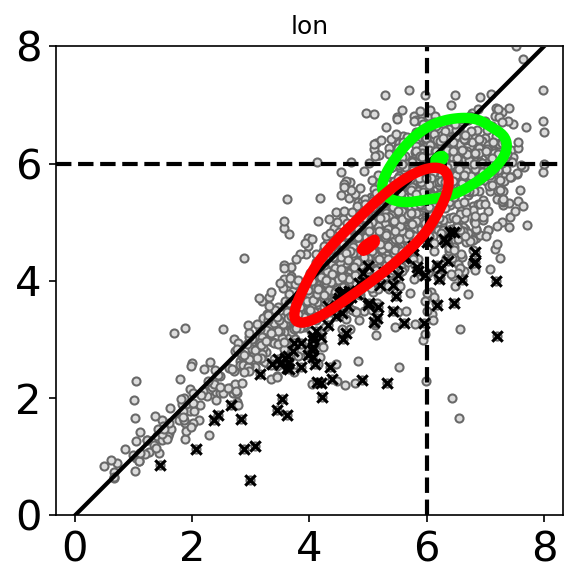

99


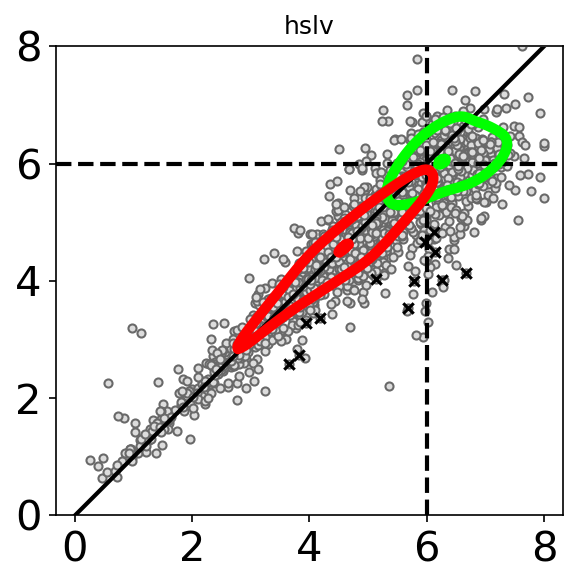

12


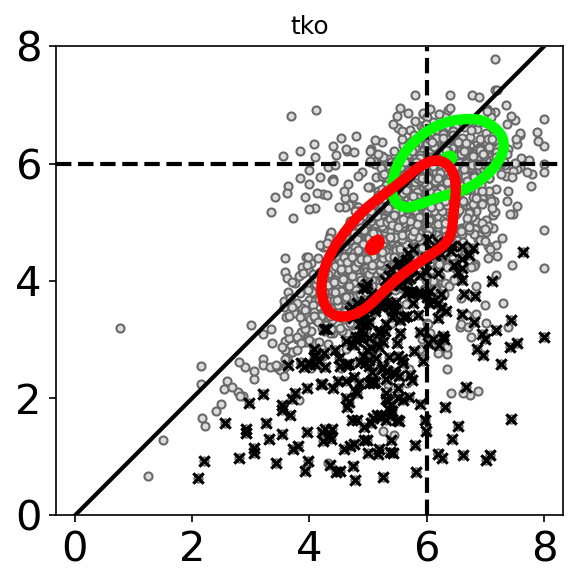

283


In [60]:
cutoff= 0.10
a= clpp6_merged
b= nlim6_merged
Dilution_half_life_hrs= 6 
filename= 'clpp'
clpp_substrates= mutant_wt_comparison(a, b,cutoff=cutoff)


a= lon6_merged
b= nlim6_merged
Dilution_half_life_hrs= 6 
filename= 'lon'
lon_substrates= mutant_wt_comparison(a, b,cutoff=cutoff)

a= hslv6_merged
b= nlim6_merged
Dilution_half_life_hrs= 6 
filename= 'hslv'
hslv_substrates= mutant_wt_comparison(a, b,cutoff=cutoff)

cutoff= 0.09
a= tko6_merged
b= nlim6_merged
Dilution_half_life_hrs= 6 
filename= 'tko'
tko_substrates= mutant_wt_comparison(a, b,cutoff=cutoff)

### Divide the different substrates into the 6 Categories defines

In [61]:
dataframe = clpp6_merged
relevant_cols= ['Protein ID', [col for col in dataframe.columns if 'average_hl' in col][1], [col for col in dataframe.columns if 'hl_std_error_new' in col][0]]
merged_all_inner= nlim6_merged[['Protein ID', 'average_hl_N_cap', 'hl_std_error_new_N']].merge(dataframe[relevant_cols], on='Protein ID', how='inner')

dataframe = lon6_merged
relevant_cols= ['Protein ID', [col for col in dataframe.columns if 'average_hl' in col][1], [col for col in dataframe.columns if 'hl_std_error_new' in col][0]]
merged_all_inner= merged_all_inner.merge(dataframe[relevant_cols], on='Protein ID', how='inner')

dataframe = hslv6_merged
relevant_cols= ['Protein ID', [col for col in dataframe.columns if 'average_hl' in col][1], [col for col in dataframe.columns if 'hl_std_error_new' in col][0]]
merged_all_inner= merged_all_inner.merge(dataframe[relevant_cols], on='Protein ID', how='inner')


dataframe = tko6_merged
relevant_cols= ['Protein ID', [col for col in dataframe.columns if 'average_hl' in col][1], [col for col in dataframe.columns if 'hl_std_error_new' in col][0]]
merged_all_inner= merged_all_inner.merge(dataframe[relevant_cols], on='Protein ID', how='inner')


merged_all_inner['Entry']= merged_all_inner['Protein ID'].apply(header_splitter)
merged_all_inner= merged_all_inner.merge(tmt5_location, on='Entry', how='left')
print (merged_all_inner.shape)


clpp_substrates['CLPP_substrate']= 'yes'
tko_substrates['TKO_substrate']='yes'
lon_substrates['LON_substrate']='yes'
hslv_substrates['HSLV_substrate']='yes'

tko_substrates_alldata= merged_all_inner.merge(tko_substrates[['Protein ID', 'TKO_substrate']], on='Protein ID', how='inner').merge(clpp_substrates[['Protein ID', 'CLPP_substrate']], on='Protein ID', how='left').merge(lon_substrates[['Protein ID', 'LON_substrate']], on='Protein ID', how='left')
tko_substrates_alldata= tko_substrates_alldata[['Protein ID', 'Gene names ']+ [col for col in tko_substrates_alldata.columns if 'average_hl' in col]]

print (tko_substrates.shape, tko_substrates_alldata.shape)
tko_substrates_alldata.head()

tko_substrates_alldata['shifts_clpp']= 1/tko_substrates_alldata['average_hl_N_cap']- (1/tko_substrates_alldata['average_hl_clpp_cap']) 
tko_substrates_alldata['shifts_lon']= 1/tko_substrates_alldata['average_hl_N_cap']- (1/tko_substrates_alldata['average_hl_lon_cap']) 
tko_substrates_alldata['shifts_hslv']= 1/tko_substrates_alldata['average_hl_N_cap']- (1/tko_substrates_alldata['average_hl_hslv_cap']) 


tko_substrates_alldata['shifts_tko']= 1/tko_substrates_alldata['average_hl_N_cap']- (1/tko_substrates_alldata['average_hl_Tripple_cap']) 
tko_substrates_alldata['shifts_total']= (1/tko_substrates_alldata['average_hl_N_cap'])-1/6

tko_substrates_alldata['shifts_clpp_pos']= tko_substrates_alldata['shifts_clpp'].map(lambda x: x if x>0 else 0 ) 
tko_substrates_alldata['shifts_lon_pos']= tko_substrates_alldata['shifts_lon'].map(lambda x: x if x>0 else 0 ) 
tko_substrates_alldata['shifts_hslv_pos']= tko_substrates_alldata['shifts_hslv'].map(lambda x: x if x>0 else 0 ) 
tko_substrates_alldata['shifts_tko_pos']= tko_substrates_alldata['shifts_tko'].map(lambda x: x if x>0 else 0 ) 


(1718, 17)
(283, 16) (224, 7)


In [62]:
tko_substrates_alldata['shifts_diff']=tko_substrates_alldata['shifts_tko_pos']- (tko_substrates_alldata['shifts_clpp_pos']+tko_substrates_alldata['shifts_lon_pos']+tko_substrates_alldata['shifts_hslv_pos'])
tko_substrates_alldata['shifts_unexplained']=tko_substrates_alldata['shifts_total']- (tko_substrates_alldata['shifts_tko_pos'])

tko_substrates_alldata['perc_redund']=tko_substrates_alldata['shifts_diff']/ tko_substrates_alldata['shifts_total']
tko_substrates_alldata['perc_clpp']=tko_substrates_alldata['shifts_clpp_pos']/ tko_substrates_alldata['shifts_total']
tko_substrates_alldata['perc_lon']=tko_substrates_alldata['shifts_lon_pos']/ tko_substrates_alldata['shifts_total']
tko_substrates_alldata['perc_hslv']=tko_substrates_alldata['shifts_hslv_pos']/ tko_substrates_alldata['shifts_total']
tko_substrates_alldata['perc_unexplained']=tko_substrates_alldata['shifts_unexplained']/ tko_substrates_alldata['shifts_total']

tko_substrates_alldata['perc_redund_pos']=tko_substrates_alldata['perc_redund'].map(lambda x: x if x>0 else 0)
tko_substrates_alldata['perc_clpp_pos']=tko_substrates_alldata['perc_clpp'].map(lambda x: x if x>0 else 0)
tko_substrates_alldata['perc_lon_pos']=tko_substrates_alldata['perc_lon'].map(lambda x: x if x>0 else 0)
tko_substrates_alldata['perc_hslv_pos']=tko_substrates_alldata['perc_hslv'].map(lambda x: x if x>0 else 0)
tko_substrates_alldata['perc_unexplained_pos']=tko_substrates_alldata['perc_unexplained'].map(lambda x: x if x>0 else 0)

tko_substrates_alldata['perc_pos_sum']= tko_substrates_alldata[['perc_redund_pos', 'perc_clpp_pos', 'perc_lon_pos', 'perc_hslv_pos', 'perc_unexplained_pos']].sum(axis=1)

tko_substrates_alldata['perc_redund_pos_norm']= tko_substrates_alldata['perc_redund_pos']/ tko_substrates_alldata['perc_pos_sum']
tko_substrates_alldata['perc_clpp_pos_norm']= tko_substrates_alldata['perc_clpp_pos']/ tko_substrates_alldata['perc_pos_sum']
tko_substrates_alldata['perc_lon_pos_norm']= tko_substrates_alldata['perc_lon_pos']/ tko_substrates_alldata['perc_pos_sum']
tko_substrates_alldata['perc_hslv_pos_norm']= tko_substrates_alldata['perc_hslv_pos']/ tko_substrates_alldata['perc_pos_sum']
tko_substrates_alldata['perc_unexplained_pos_norm']= tko_substrates_alldata['perc_unexplained_pos']/ tko_substrates_alldata['perc_pos_sum']
tko_substrates_alldata['perc_clpp_lon_hslv_add_pos_norm']= tko_substrates_alldata['perc_lon_pos_norm']+tko_substrates_alldata['perc_clpp_pos_norm']+tko_substrates_alldata['perc_hslv_pos_norm']
   
tko_substrates_alldata.head()

,Protein ID,Gene names,average_hl_N_cap,average_hl_clpp_cap,average_hl_lon_cap,average_hl_hslv_cap,average_hl_Tripple_cap,shifts_clpp,shifts_lon,shifts_hslv,...,perc_lon_pos,perc_hslv_pos,perc_unexplained_pos,perc_pos_sum,perc_redund_pos_norm,perc_clpp_pos_norm,perc_lon_pos_norm,perc_hslv_pos_norm,perc_unexplained_pos_norm,perc_clpp_lon_hslv_add_pos_norm
0,sp|P00370|DHE4_ECOLI,gdhA,1.879021,1.974636,2.130432,1.800898,3.526992,0.025770,0.062804,-0.023087,...,0.171818,0.000000,0.319707,1.000000,0.437975,0.070500,0.171818,0.000000,0.319707,0.242318
1,sp|P00561|AK1H_ECOLI,thrA,4.286828,4.313951,4.887220,4.513000,5.653021,0.001467,0.028657,0.011691,...,0.430252,0.175519,0.153588,1.000000,0.218622,0.022019,0.430252,0.175519,0.153588,0.627790
2,sp|P00579|RPOD_ECOLI,rpoD,4.147468,4.471296,5.278786,4.308183,5.994172,0.017462,0.051673,0.008995,...,0.694123,0.120822,0.002177,1.051688,0.000000,0.223038,0.660008,0.114884,0.002070,0.997930
3,sp|P00936|CYAA_ECOLI,cyaA,1.274936,3.635320,1.043515,1.143667,4.232218,0.509274,-0.173946,-0.090027,...,0.000000,0.000000,0.112704,1.000000,0.062809,0.824487,0.000000,0.000000,0.112704,0.824487
4,sp|P03004|DNAA_ECOLI,dnaA,2.936367,4.236559,3.853184,2.831544,5.490637,0.104516,0.081031,-0.012607,...,0.465991,0.000000,0.088916,1.155954,0.000000,0.519958,0.403122,0.000000,0.076920,0.923080


In [63]:
print (tko_substrates_alldata.shape)

(224, 35)


In [64]:
clpp_only = tko_substrates_alldata[tko_substrates_alldata['perc_clpp_pos_norm']>0.60]
lon_only= tko_substrates_alldata[tko_substrates_alldata['perc_lon_pos_norm']>0.60]
hslv_only= tko_substrates_alldata[tko_substrates_alldata['perc_hslv_pos_norm']>0.60]
print (clpp_only.shape, lon_only.shape, hslv_only.shape)

(64, 35) (14, 35) (1, 35)


In [65]:
#Additive
clpp_lon_add_80=  tko_substrates_alldata[(tko_substrates_alldata['perc_clpp_lon_hslv_add_pos_norm']>0.72)]
temp= clpp_lon_add_80[~(clpp_lon_add_80['Gene names '].isin(clpp_only['Gene names ']))]
clpp_lon_add=  temp[~(temp['Gene names '].isin(lon_only['Gene names ']))]
clpp_lon_hslv_add=  clpp_lon_add[~(clpp_lon_add['Gene names '].isin(hslv_only['Gene names ']))]
print (clpp_lon_hslv_add.shape)

(82, 35)


In [66]:
#Redundant 
y1= tko_substrates_alldata[(tko_substrates_alldata['perc_redund_pos_norm']>0.20)]
y1= y1[~(y1['Gene names '].isin(clpp_only['Gene names ']))]
y1= y1[~(y1['Gene names '].isin(lon_only['Gene names ']))]
y1= y1[~(y1['Gene names '].isin(hslv_only['Gene names ']))]
y1= y1[~(y1['Gene names '].isin(clpp_lon_hslv_add['Gene names ']))]
print (y1.shape)
print (len(tko_substrates_alldata)-len(clpp_only)-len(lon_only)-len(hslv_only)-len(clpp_lon_hslv_add)-len(y1))

(41, 35)
22


In [67]:
#Unexplained
unexplained_only= tko_substrates_alldata[tko_substrates_alldata['perc_unexplained_pos_norm']>0.50]
print(unexplained_only.shape)


leftover= pd.DataFrame({'Gene names ':list(set(tko_substrates_alldata['Gene names '])-set(clpp_only['Gene names '])-set(lon_only['Gene names '])-set(hslv_only['Gene names ']) -set(clpp_lon_hslv_add['Gene names '])- set(y1['Gene names '])- set(unexplained_only['Gene names ']))})
leftover= leftover.merge(tko_substrates_alldata)


actively_degrading_tko0= tko6_merged[tko6_merged['Degrading']=='yes'][['Protein ID']].merge(merged_all_inner[['Protein ID']], on='Protein ID',how='left' )
actively_degrading_tko0= actively_degrading_tko0.merge(nlim6_merged[nlim6_merged['Degrading']=='yes'][['Protein ID']],  on='Protein ID',how='inner')
print (actively_degrading_tko0.shape)

actively_degrading_tko= actively_degrading_tko0[(~(actively_degrading_tko0['Protein ID'].isin(tko_substrates_alldata['Protein ID'])))]
actively_degrading_tko['active_degrading']='yes'

actively_degrading_tko['perc_clpp_pos_norm']= 0
actively_degrading_tko['perc_lon_pos_norm']= 0
actively_degrading_tko['perc_hslv_pos_norm']= 0
actively_degrading_tko['perc_redund_pos_norm']= 0
actively_degrading_tko['perc_clpp_lon_hslv_add_pos_norm']=0
actively_degrading_tko['perc_unexplained_pos_norm']= 1
print (actively_degrading_tko.shape)

degrading1=actively_degrading_tko[['Protein ID']+[col for col in actively_degrading_tko.columns if 'pos_norm'in col]]
degrading2=unexplained_only[['Protein ID']+[col for col in actively_degrading_tko.columns if 'pos_norm'in col]]
degrading3=leftover[['Protein ID']+[col for col in actively_degrading_tko.columns if 'pos_norm'in col]]

actively_degrading_tko= pd.concat([degrading1, degrading2, degrading3], axis=0)
actively_degrading_tko['Entry']= actively_degrading_tko['Protein ID'].apply(header_splitter)
actively_degrading_tko= actively_degrading_tko.merge(tmt5_location, on='Entry', how='left').merge(nlim6_merged[['Protein ID', 'average_hl_N_cap']]).merge(tko6_merged[['Protein ID', 'average_hl_Tripple_cap']])

print (clpp_only.shape, lon_only.shape, hslv_only.shape, clpp_lon_hslv_add.shape, y1.shape, actively_degrading_tko.shape)

(0, 35)
(111, 1)
(84, 8)
(64, 35) (14, 35) (1, 35) (82, 35) (41, 35) (106, 15)


C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\2338959240.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actively_degrading_tko['active_degrading']='yes'
C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\2338959240.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actively_degrading_tko['perc_clpp_pos_norm']= 0
C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\2338959240.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

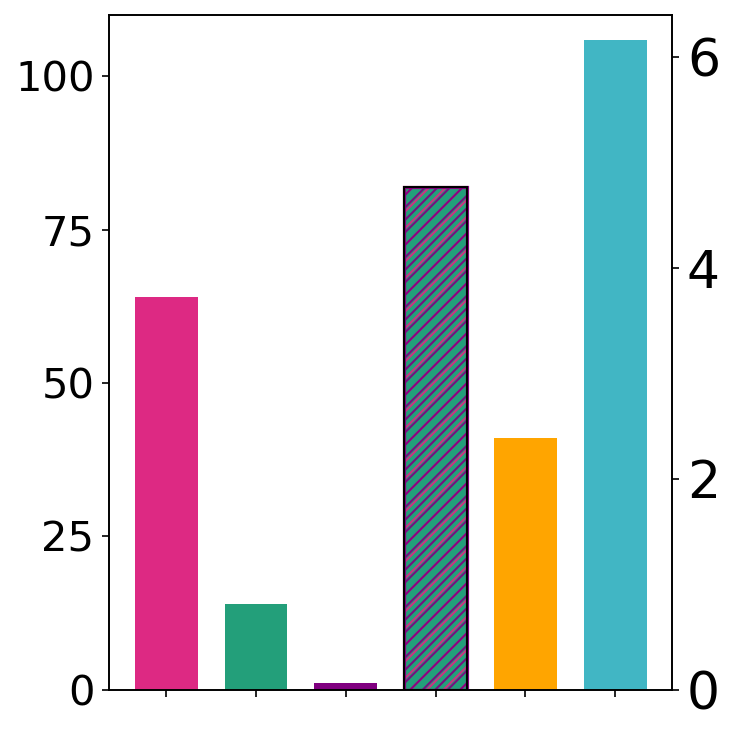

In [68]:
fig=plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_subplot(111)

xvalue= np.arange(1,5,1)
yvalue= np.array([len(clpp_only), len(lon_only), len(hslv_only),len(clpp_lon_hslv_add),len(y1), len(actively_degrading_tko)])

colors1= [ "#dd2983", "#239f7a",'purple',"#239f7a","orange", '#41b6c4']
hatch= ['', '','', '//', '', '']
labels=['ClpP', 'Lon','HslV', 'Additive', 'Redundant', 'Actively degrading']
i=0
while i< len(yvalue): 

    ax.bar(i, yvalue[i], width= 0.7,color=colors1[i], alpha=1)
    i=i+1
ax.bar(3, yvalue[3], width= 0.7,color="none", edgecolor='#dd2983',alpha=0.9, lw=1.5,hatch='///')
# ax.bar(3, yvalue[3], width= 0.7,color="none", edgecolor='white',zorder=5, lw=2)
ax.set_yticks(np.arange(0,200,25))
ax.set_yticklabels(np.arange(0,200,25),fontsize=20)
ax.set_xticks([0,1,2,3,4,5])
ax.set_ylim(0,110)
ax.set_xticklabels([])



ax2= ax.twinx()
ax2.bar(3, yvalue[3]/len(merged_all_inner)*100, width= 0.7,color="none", edgecolor='purple',alpha=0.9, lw=1.5,hatch='////')
ax2.bar(3, yvalue[3]/len(merged_all_inner)*100, width= 0.7,color="none",lw=1, edgecolor='black',zorder=10)
ax2.set_yticks([0,2,4,6,8])
ax2.set_yticklabels([0,2,4,6,8], fontsize=25)
ax2.set_ylim([0,110/len(merged_all_inner)*100])
fig.tight_layout()
plt.show()


In [108]:
yvalue

array([ 64,  14,   1,  82,  41, 106])

C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\1485340494.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [0.0,0.2,0.4,0.6,0.8,1.0],rotation=90)


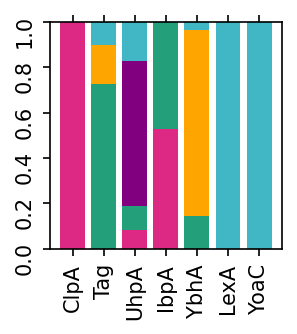

In [44]:
clpp_only_plot= tko_substrates_alldata[tko_substrates_alldata['perc_clpp_pos_norm']>0.90].sort_values('shifts_clpp_pos', ascending=False).head(1)
lon_only_plot = lon_only[lon_only['Gene names '].str.contains('tag')==True]

hslv_only_plot = hslv_only

additive_plot= clpp_lon_hslv_add[clpp_lon_hslv_add['Gene names '].str.contains('ibpA')==True]
redund_plot=y1[y1['Gene names '].str.contains('ybhA')==True]
active_degrading=actively_degrading_tko[(actively_degrading_tko['Gene names '].str.contains('lexA')==True)| (actively_degrading_tko['Gene names '].str.contains('yoaC')==True)]


# redund_plot= y1.sort_values('shifts_tko', ascending=False).head(2)
all_plot= pd.concat([clpp_only_plot, lon_only_plot, hslv_only_plot,additive_plot, redund_plot, active_degrading],axis=0)

width1= 0.4

fig, ax = plt.subplots(figsize = (2,2), dpi=150)
positions= np.arange(0, len(all_plot)/2, 0.5)
ax.bar(positions, all_plot['perc_clpp_pos_norm'], width=width1, color='#dd2983', alpha=1)
bottom1= all_plot['perc_clpp_pos_norm']
ax.bar(positions, all_plot['perc_lon_pos_norm'], bottom=bottom1, width=width1,color='#239f7a', alpha=1)
bottom1= np.array(all_plot['perc_clpp_pos_norm'])+np.array(all_plot['perc_lon_pos_norm'])
ax.bar(positions, all_plot['perc_hslv_pos_norm'], bottom=bottom1, width=width1,color='purple', alpha=1)
bottom1= np.array(all_plot['perc_clpp_pos_norm'])+np.array(all_plot['perc_lon_pos_norm'])+np.array(all_plot['perc_hslv_pos_norm'])

ax.bar(positions, all_plot['perc_redund_pos_norm'], bottom=bottom1, width=width1, color='orange', alpha=1 )
bottom1= np.array(all_plot['perc_clpp_pos_norm'])+np.array(all_plot['perc_lon_pos_norm'])+np.array(all_plot['perc_hslv_pos_norm'])+np.array(all_plot['perc_redund_pos_norm'])

ax.bar(positions, all_plot['perc_unexplained_pos_norm'], bottom=bottom1, width=width1, color='#41b6c4', alpha=1 )

ax.set_xticks(positions)

list2= []
for i in list(all_plot['Gene names ']): 
    list2.append(str(i).strip()[0].upper()+ str(i).strip()[1:])

ax.set_xticklabels(list2, rotation=90)
ax.set_yticklabels( [0.0,0.2,0.4,0.6,0.8,1.0],rotation=90)
ax.xaxis.set_ticks_position('both')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim([0,1])
# plt.xlim([-0.5,6])
plt.show()

In [69]:
print (tko_substrates_alldata.shape, degrading1.shape)

(224, 35) (84, 7)


In [70]:
224+84

308

#### Table S2

C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\3230486124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clpp_only['Classification']= 'ClpP only'
C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\3230486124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon_only['Classification']= 'Lon only'
C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\3230486124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

308


C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\3230486124.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( [0.0,0.2,0.4,0.6,0.8,1.0],rotation=0)


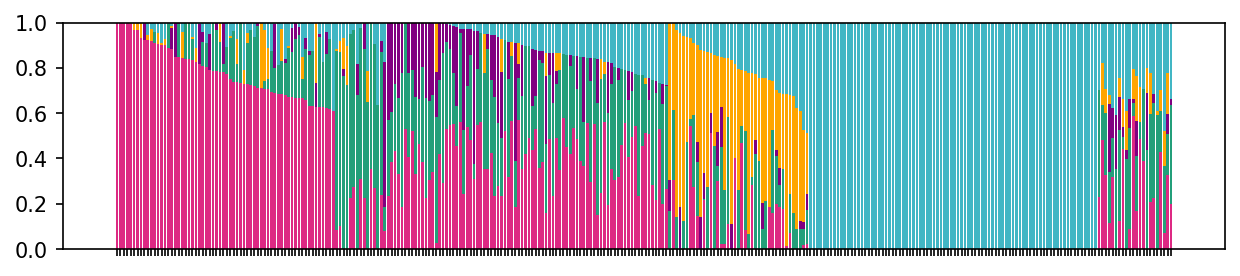

In [86]:
clpp_only['Classification']= 'ClpP only'
lon_only['Classification']= 'Lon only'
hslv_only['Classification']= 'HslV only'
clpp_lon_hslv_add['Classification']= 'Additive'
y1['Classification']= 'Redundant'
actively_degrading_tko['Classification']= 'Actively degrading in Tripple KO'

# redund_plot= y1.sort_values('shifts_tko', ascending=False).head(2)
all_plot= pd.concat([clpp_only.sort_values('perc_clpp_pos_norm', ascending=False), lon_only.sort_values('perc_lon_pos_norm', ascending=False), 
                    hslv_only.sort_values('perc_hslv_pos_norm', ascending=False), clpp_lon_hslv_add.sort_values('perc_unexplained_pos_norm', ascending=True), 
                    y1.sort_values('perc_unexplained_pos_norm', ascending=True), actively_degrading_tko
                    ],axis=0 )
print (len(all_plot))
# , lon_only_plot, hslv_only_plot,clpp_lon_hslv_add,y1, actively_degrading_tko

width1= 0.4
fig, ax = plt.subplots(figsize = (10,2), dpi=150)
positions= np.arange(0, len(all_plot)/2, 0.5)
ax.bar(positions, all_plot['perc_clpp_pos_norm'], width=width1, color='#dd2983', alpha=1)
bottom1= all_plot['perc_clpp_pos_norm']
ax.bar(positions, all_plot['perc_lon_pos_norm'], bottom=bottom1, width=width1,color='#239f7a', alpha=1)
bottom1= np.array(all_plot['perc_clpp_pos_norm'])+np.array(all_plot['perc_lon_pos_norm'])
ax.bar(positions, all_plot['perc_hslv_pos_norm'], bottom=bottom1, width=width1,color='purple', alpha=1)
bottom1= np.array(all_plot['perc_clpp_pos_norm'])+np.array(all_plot['perc_lon_pos_norm'])+np.array(all_plot['perc_hslv_pos_norm'])

ax.bar(positions, all_plot['perc_redund_pos_norm'], bottom=bottom1, width=width1, color='orange', alpha=1 )
bottom1= np.array(all_plot['perc_clpp_pos_norm'])+np.array(all_plot['perc_lon_pos_norm'])+np.array(all_plot['perc_hslv_pos_norm'])+np.array(all_plot['perc_redund_pos_norm'])

ax.bar(positions, all_plot['perc_unexplained_pos_norm'], bottom=bottom1, width=width1, color='#41b6c4', alpha=1 )

ax.set_xticks(positions)
ax.set_xticklabels(list([]), rotation=90)
ax.set_yticklabels( [0.0,0.2,0.4,0.6,0.8,1.0],rotation=0)
# ax.xaxis.set_ticks_position('both')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim([0,1])
# plt.xlim([-0.5, len(all_plot)])
plt.show()

In [88]:
table_s2= all_plot.reset_index()[['Protein ID', 'Gene names ', 'Classification']+ [col for col in all_plot.columns if 'pos_norm' in col]].rename(columns={'perc_redund_pos_norm': 'Fractional_redundant_contribution', 'perc_clpp_pos_norm':'Fractional_clpP_contribution','perc_lon_pos_norm':'Fractional_lon_contribution', 'perc_hslv_pos_norm':'Fractional_hslV_contribution', 'perc_unexplained_pos_norm':'Fractional_unexplained_in_trippleKO_contribution' }).drop('perc_clpp_lon_hslv_add_pos_norm', axis=1)
table_s2.to_excel('Table_S2_final.xlsx')

In [94]:
len(table_s2['Protein ID'].unique()), len(table_s2)

(308, 308)

# Validation with other studies

In [71]:
print (merged_all_inner.shape)
all_genes= merged_all_inner

def fischer_exact(df1, df2): 
    a= df1.merge(df2).shape[0]
    b= df2.shape[0]-df1.merge(df2).shape[0]
    c= df1.merge(all_genes).shape[0]-df1.merge(df2).shape[0]
    d= len(all_genes)-(a+b+c)
    table= np.array([[a,b], [c,d]])
    oddsr, p = fisher_exact(table, alternative='two-sided')
    return p 

(1718, 17)


### Additive and redundant set of proteins

In [79]:
X= pd.concat([clpp_lon_hslv_add[['Protein ID', 'Gene names ']],y1 [['Protein ID', 'Gene names ']]], axis=0)

In [95]:
clpp_trap_lit= pd.read_excel('../Ecoli_resources_latest/clpxp_trap_substrates_lit.xlsx')
clpp_trap_lit.head()
clpp_trap_lit1= clpp_trap_lit.merge(tmt5_location[['Entry', 'Gene names ','Subcellular location [CC] 1', 'membrane_confirmation']], on='Gene names ', how='inner')
clpp_trap_lit11= clpp_trap_lit1.merge(merged_all_inner[['Gene names ']], on='Gene names ', how='inner')
print (clpp_trap_lit1.shape, clpp_trap_lit11.shape)


print (fischer_exact(clpp_trap_lit11[['Gene names ']], clpp_only[['Gene names ']]))

print (fischer_exact(clpp_trap_lit11[['Gene names ']], lon_only[['Gene names ']]))

print (fischer_exact(clpp_trap_lit11[['Gene names ']], X[['Gene names ']]))

print (fischer_exact(clpp_trap_lit11[['Gene names ']], actively_degrading_tko[['Gene names ']]))
list_clpp= [fischer_exact(clpp_trap_lit11[['Gene names ']], clpp_only[['Gene names ']]),fischer_exact(clpp_trap_lit11[['Gene names ']], lon_only[['Gene names ']]),fischer_exact(clpp_trap_lit11[['Gene names ']], X[['Gene names ']]), fischer_exact(clpp_trap_lit11[['Gene names ']], actively_degrading_tko[['Gene names ']])   ]
list_clpp


(56, 5) (40, 5)
6.188631995204091e-09
1.0
0.5261998287864091
0.7337088593273555


[6.188631995204091e-09, 1.0, 0.5261998287864091, 0.7337088593273555]

### lon

In [96]:
lontrap= pd.read_excel('../Ecoli_resources_latest/lon_trap_all_substrates.xlsx')
lontrap.head()
lontrap_bonafide=lontrap [(lontrap['Degree']=='verified')|(lontrap['Degree']=='confident')]
lontrap1= lontrap.merge(tmt5_location[['Entry', 'Gene names ','Subcellular location [CC] 1', 'membrane_confirmation']], on='Gene names ', how='inner')
lontrap11= lontrap1.merge(merged_all_inner[['Gene names ']], on='Gene names ', how='inner')

lontrap_bonafide1= lontrap_bonafide.merge(tmt5_location[['Entry', 'Gene names ','Subcellular location [CC] 1', 'membrane_confirmation']], on='Gene names ', how='inner')
lontrap_bonafide11= lontrap_bonafide1.merge(merged_all_inner[['Gene names ']], on='Gene names ', how='inner')

print (lontrap1.shape, lontrap11.shape,lontrap_bonafide11.shape)

(42, 7) (31, 7) (5, 7)


In [97]:
list_lon=[fischer_exact(lontrap11[['Gene names ']], clpp_only[['Gene names ']]),fischer_exact(lontrap11[['Gene names ']], lon_only[['Gene names ']]), fischer_exact(lontrap11[['Gene names ']], X[['Gene names ']]), fischer_exact(lontrap11[['Gene names ']], actively_degrading_tko[['Gene names ']])   ]
list_lon

[0.1057451818577409,
 0.22578432720476815,
 0.27484005775782966,
 0.7167082517594191]

In [109]:
fischer_exact(lontrap11[['Gene names ']], tko_substrates_alldata[['Gene names ']])

0.05243501066331692

#### HSLV

In [98]:
known_degraders= pd.read_excel("../Ecoli_resources_latest/Protein Degradation Literature and Dogma.xlsx")
known_degraders.head()

known_degraders1= known_degraders.rename(columns= {'Gene': 'Gene names '})

hslv_known= known_degraders[known_degraders['Protease Responsible'].str.contains('hsl')==True].rename(columns= {'Gene': 'Gene names '})

hslv_known11= hslv_known.merge(merged_all_inner, on='Gene names ', how='inner')
print (hslv_known11.shape, hslv_known.shape)


(4, 21) (10, 5)


In [102]:
print (fischer_exact(hslv_known11[['Gene names ']], clpp_only[['Gene names ']]))

print (fischer_exact(hslv_known11[['Gene names ']], lon_only[['Gene names ']]))
print (fischer_exact(hslv_known11[['Gene names ']], X[['Gene names ']]))
print (fischer_exact(hslv_known11[['Gene names ']], actively_degrading_tko[['Gene names ']]))

list_hslv= [fischer_exact(hslv_known11[['Gene names ']], clpp_only[['Gene names ']]),fischer_exact(hslv_known11[['Gene names ']], lon_only[['Gene names ']]), fischer_exact(hslv_known11[['Gene names ']], X[['Gene names ']]),fischer_exact(hslv_known11[['Gene names ']], actively_degrading_tko[['Gene names ']])   ]
list_hslv

1.0
1.0
0.0013595300349343732
1.0


[1.0, 1.0, 0.0013595300349343732, 1.0]

## Ftsh

In [100]:
ftsh_trap= pd.read_excel('../Ecoli_resources_latest/arends2016_ftshtrap.xlsx').rename(columns={'Unnamed: 1':'Gene names ', 'Unnamed: 9':'exp_phase','Unnamed: 17':'stationary_phase' }).dropna(subset=['Gene names '])
ftsh_trap.head()
ftsh_trap1= ftsh_trap[ftsh_trap['stationary_phase'].isnull()==False]
print (ftsh_trap1.shape)
ftsh_trap11= ftsh_trap1.merge(merged_all_inner, on='Gene names ', how='inner')
print (ftsh_trap11.shape, ftsh_trap1.shape)

print (fischer_exact(ftsh_trap11[['Gene names ']], clpp_only[['Gene names ']]))
print (fischer_exact(ftsh_trap11[['Gene names ']], lon_only[['Gene names ']]))
print (fischer_exact(ftsh_trap11[['Gene names ']], X[['Gene names ']]))
print (fischer_exact(ftsh_trap11[['Gene names ']], actively_degrading_tko[['Gene names ']]))


list_ftsh= [fischer_exact(ftsh_trap11[['Gene names ']], clpp_only[['Gene names ']]),fischer_exact(ftsh_trap11[['Gene names ']], lon_only[['Gene names ']]), fischer_exact(ftsh_trap11[['Gene names ']], X[['Gene names ']]),fischer_exact(ftsh_trap11[['Gene names ']], actively_degrading_tko[['Gene names ']])   ]
list_ftsh

(31, 19)
(21, 35) (31, 19)
1.0
1.0
0.0026488905620739205
0.6358822805360527


[1.0, 1.0, 0.0026488905620739205, 0.6358822805360527]

#### heatmap

In [103]:
heatmap=pd.DataFrame({'list_clpp':list_clpp, 'list_lon': list_lon, 'list_hslv':list_hslv, 'list_ftsh':list_ftsh}).transpose()
np.log10(np.array(heatmap))

array([[-8.20840534,  0.        , -0.2788493 , -0.13447624],
       [-0.97573941, -0.64630621, -0.56091997, -0.1446576 ],
       [ 0.        ,  0.        , -2.86661119,  0.        ],
       [ 0.        ,  0.        , -2.57693598, -0.19662328]])

In [105]:
heatmap

,0,1,2,3
list_clpp,6.188632e-09,1.000000,0.526200,0.733709
list_lon,1.057452e-01,0.225784,0.274840,0.716708
list_hslv,1.000000e+00,1.000000,0.001360,1.000000
list_ftsh,1.000000e+00,1.000000,0.002649,0.635882


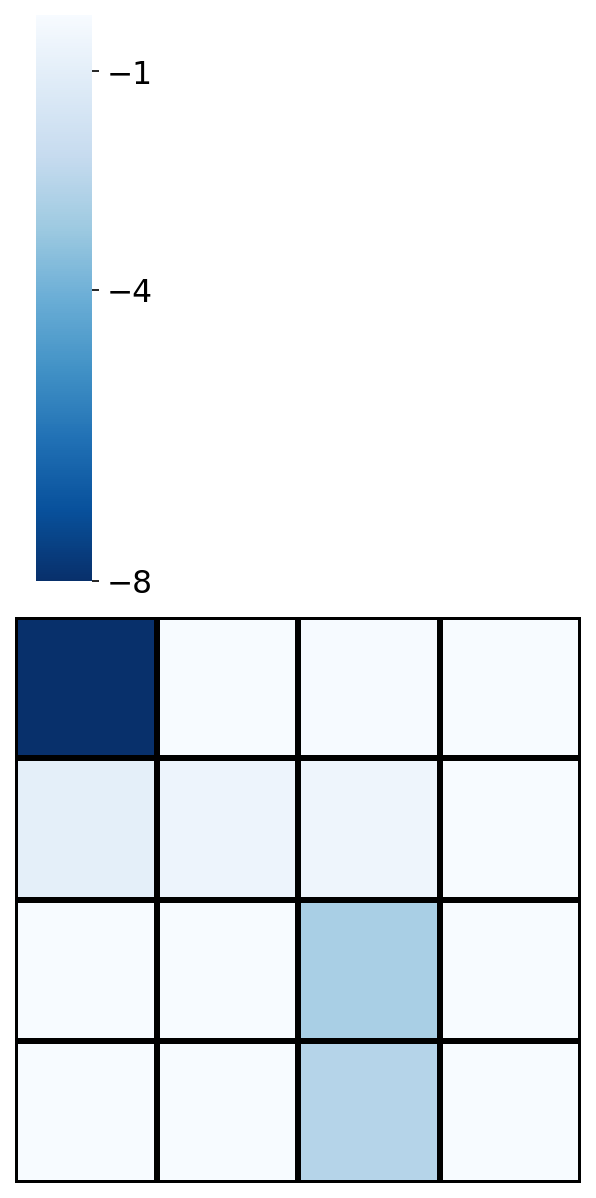

In [104]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(5,5), dpi=150)

cax = inset_axes(ax,
                 width="10%",  # width: 40% of parent_bbox width
                 height="100%",  # height: 10% of parent_bbox height
                 loc='upper left',
                 bbox_to_anchor=(0, 1.1, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=1,
                 )

im = sns.heatmap(np.log10(np.array(heatmap)), cmap='Blues_r', vmin=-8, vmax=np.log10(0.6), ax=ax,
#                annot=True, fmt='.1e',
                 xticklabels=[''], yticklabels=[''],square=True, lw=2, linecolor='black', linewidths=0.09, ls='--',

                 cbar_ax=cax,

#                 cbar_kws={"shrink":0.5, 'orientation':'horizontal', 'fraction':0.4, 'anchor':(-4, 1.0)}, annot_kws={"fontsize":15}
                )

ax.set_xticks([]) 
ax.set_yticks([]) 
plt.yticks([-8,-4,-1],fontsize=15)
plt.show()

# Figure 6 ......

In [89]:
Dilution_half_life_hrs=6
filename= 'C limited 6'
clim6_merged_inner= merge_replicates(clim6_1,clim6_2, filename1= filename)

Dilution_half_life_hrs=12
filename= 'C limited 12'
clim12_merged_inner= merge_replicates(clim12_1,clim12_2,  filename1= filename)

Dilution_half_life_hrs=(42.45/60)
filename= 'exp growth'
exp_merged_inner = merge_replicates(expgrowth_1,expgrowth_2, filename1= filename)

Dilution_half_life_hrs=3
filename= 'C limited 3'
clim3_merged_inner= merge_replicates(clim3_1,clim3_2, filename1= filename)

The number of proteins in each data set merged 2302
Fraction of the proteome degrading 0.163336
The number of proteins in each data set merged 2255
Fraction of the proteome degrading 0.223503
The number of proteins in each data set merged 2190
Fraction of the proteome degrading 0.015068
The number of proteins in each data set merged 2321
Fraction of the proteome degrading 0.104265


In [90]:
# Files used for the scaling comparison
clim3_merged_inner1= clim3_merged_inner[['Protein ID', 'average_hl_C', 'hl_std_error_new_C', 'Degrading']].rename(columns= {'average_hl_C':'average_hl_C3', 'hl_std_error_new_C': 'hl3_std_error_new', 'Degrading':'Degrading_3'})
clim3_merged_inner1

clim6_merged_inner1= clim6_merged_inner[['Protein ID', 'average_hl_C', 'hl_std_error_new_C', 'Degrading']].rename(columns= {'average_hl_C':'average_hl_C6', 'hl_std_error_new_C': 'hl6_std_error_new', 'Degrading':'Degrading_6'})
clim6_merged_inner1

clim12_merged_inner1= clim12_merged_inner[['Protein ID', 'average_hl_C', 'hl_std_error_new_C', 'Degrading']].rename(columns= {'average_hl_C':'average_hl_C12', 'hl_std_error_new_C': 'hl12_std_error_new', 'Degrading':'Degrading_12'})
clim12_merged_inner1

exp_merged_inner1= exp_merged_inner[['Protein ID', 'average_hl_exp', 'hl_std_error_new_exp', 'Degrading']].rename(columns= {'average_hl_exp':'average_hl_exp', 'hl_std_error_new_exp': 'hl_exp_std_error_new', 'Degrading':'Degrading_exp'})
exp_merged_inner1

,Protein ID,average_hl_exp,hl_exp_std_error_new,Degrading_exp
0,sp|O32583|THIS_ECOLI,0.551571,0.122069,NaN
1,sp|P00350|6PGD_ECOLI,0.857141,0.060844,NaN
2,sp|P00363|FRDA_ECOLI,0.779854,0.060844,NaN
3,sp|P00370|DHE4_ECOLI,0.720500,0.060844,NaN
4,sp|P00393|DHNA_ECOLI,1.022428,0.299597,NaN
...,...,...,...,...
2185,sp|Q57261|TRUD_ECOLI,0.933636,0.110172,NaN
2186,sp|Q59385|COPA_ECOLI,0.757285,0.060844,NaN
2187,sp|Q6BF17|DGOD_ECOLI,0.607280,0.060844,NaN
2188,sp|Q7DFV3|YMGG_ECOLI,0.331588,0.055240,yes


In [91]:
def function_scaling_plot (xaxis1, d1, d2, scaled): 
    if scaled==False: 
          yaxis_plot= 1/(1/xaxis1-1/d1+1/d2)
    else: yaxis_plot= d2/d1*xaxis1
    return yaxis_plot

## Example 3 vs 12

C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\1252621774.py:3: RuntimeWarning: divide by zero encountered in true_divide
  yaxis_plot= 1/(1/xaxis1-1/d1+1/d2)


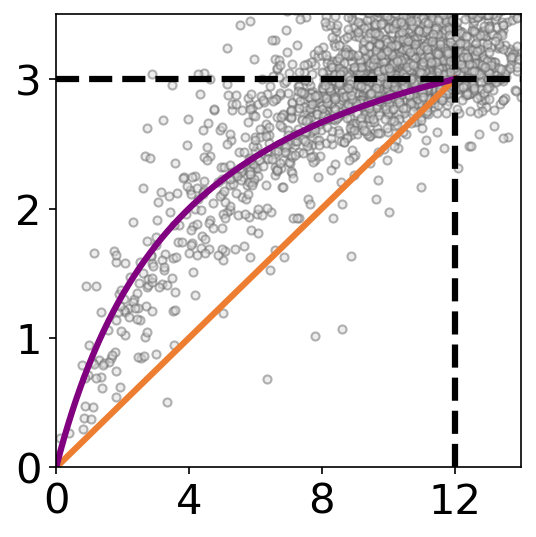

In [92]:
c_scaling3_12= clim3_merged_inner1.merge(clim12_merged_inner1, on='Protein ID', how='inner')
c_scaling3_12['Entry']= c_scaling3_12['Protein ID'].apply(header_splitter)
c_scaling3_12= c_scaling3_12.merge(tmt5_location, on='Entry', how='left')

# Cap the half lives 
c_scaling3_12['average_hl_C3_cap']= c_scaling3_12['average_hl_C3'].map(lambda x: 3 if x> 3 else x)
c_scaling3_12['average_hl_C12_cap']= c_scaling3_12['average_hl_C12'].map(lambda x: 12 if x> 12 else x)

# Throw out proteins that are very noisy based on standard error of two replicates
c_scaling3_121= c_scaling3_12[(c_scaling3_12['average_hl_C3_cap']<5)& (c_scaling3_12['hl12_std_error_new']<3.6)]
# plt.hist(c_scaling3_121['hl12_std_error_new'], alpha=0.5)
# plt.hist(c_scaling3_121['hl3_std_error_new'], alpha=0.5)
# plt.xlabel('Standard_error_new')
# plt.show()

fig=plt.figure(figsize=(4,4), dpi=150)
ax = fig.add_subplot(111)

ax.scatter(c_scaling3_121['average_hl_C12'], c_scaling3_121['average_hl_C3'], s=15, alpha=0.5, color='gainsboro', edgecolors='dimgray')

xaxis_plot= np.linspace(0,12,10000)

plt.plot(xaxis_plot,function_scaling_plot(xaxis_plot,12,3, scaled=True), ls='-', lw=3, color='#ed7d31', label='Scaled')

plt.plot(xaxis_plot,function_scaling_plot(xaxis_plot,12,3, scaled=False), ls='-', lw=3, color='purple', label='Not scaled')


ax.set_yticks(np.arange(0,5, 1))
ax.set_xticks(np.arange(0,16,4))

ax.set(ylim=(0, 3.5), xlim=(0,14))


plt.axhline(3, color='black', ls='--', lw=3)
plt.axvline(12, color='black', ls='--', lw=3)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()





##### Likelihood ratio

In [93]:
c_scaling3_121['residuals_not_scaled']=np.square(np.abs(function_scaling_plot(c_scaling3_121['average_hl_C12_cap'], 12,3, scaled=False)- c_scaling3_121['average_hl_C3_cap']))
c_scaling3_121['residuals_scaled']= np.square(np.abs(function_scaling_plot(c_scaling3_121['average_hl_C12_cap'], 12,3, scaled=True)- c_scaling3_121['average_hl_C3_cap']))

df= len(c_scaling3_121)
df/2*np.log10((c_scaling3_121['residuals_scaled'].sum()/c_scaling3_121['residuals_not_scaled'].sum()))

C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\3414715988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_scaling3_121['residuals_not_scaled']=np.square(np.abs(function_scaling_plot(c_scaling3_121['average_hl_C12_cap'], 12,3, scaled=False)- c_scaling3_121['average_hl_C3_cap']))
C:\Users\gupta\AppData\Local\Temp\ipykernel_24460\3414715988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_scaling3_121['residuals_scaled']= np.square(np.abs(function_scaling_plot(c_scaling3_121['average_hl_C12_cap']

856.8474673283932